In [205]:
from scipy.io.wavfile import write
import matplotlib.pyplot as plt
import librosa 
import numpy as np
import IPython.display as ipd

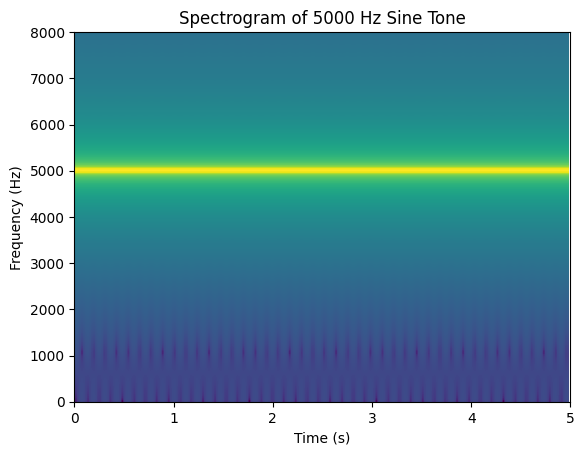

In [206]:
sr = 44100 # Recorded speech sampling rate
duration = 5 # 5 second duration
tone_frequency = 5000 # 5000 Hz tone

N = int(sr*duration) # Sample number
t = np.linspace(0, duration, N, endpoint=False) # Time vector

sine_tone = np.sin(2*np.pi*tone_frequency*t)

scaled_sine_tone = (sine_tone*32767).astype(np.int16) # Need to scale for right format
write("teamJCLM-sinetone.wav", sr, scaled_sine_tone) # Saving to WAV file

plt.specgram(sine_tone, Fs = sr, NFFT=1024)
plt.title('Spectrogram of 5000 Hz Sine Tone')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.xlim(0, 5)
plt.ylim(0, 8000)
plt.show()

In [207]:
# Playing chirp signal
ipd.Audio(sine_tone, rate=sr)

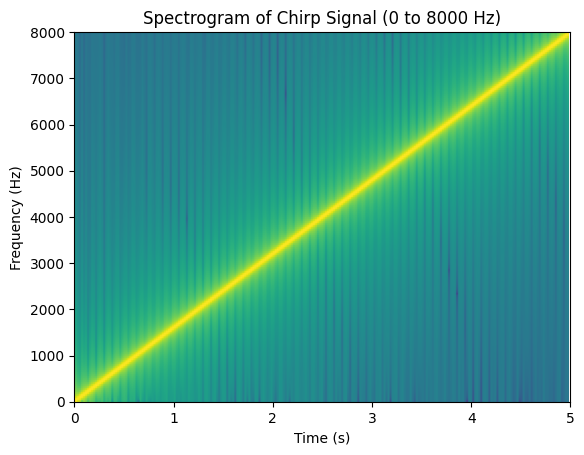

In [208]:
from scipy.signal import chirp

# Chirps signal frequencies
f1 = 0
f2 = 8000

chirp_signal = chirp(t, f1, duration, f2, method='linear')

scaled_chirp_signal = (chirp_signal*32767).astype(np.int16) # Need to scale for right format
write("teamJCLM-chirp.wav", sr, scaled_chirp_signal) # Saving to WAV file

plt.specgram(chirp_signal, Fs=sr, NFFT=1024)
plt.title('Spectrogram of Chirp Signal (0 to 8000 Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.xlim(0, 5)
plt.ylim(0, 8000)
plt.show()

In [209]:
# Playing chirp signal
ipd.Audio(chirp_signal, rate=sr)

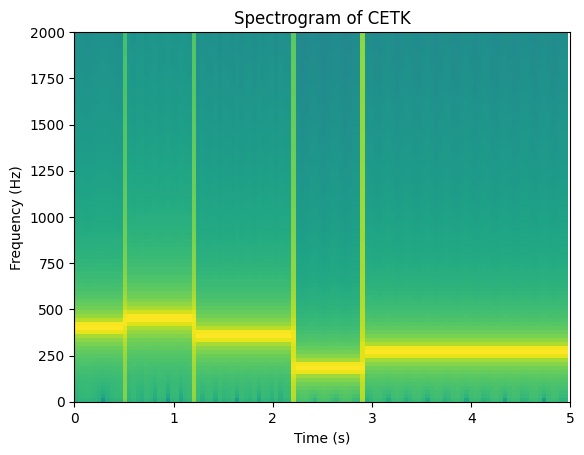

In [210]:
frequencies = [392, 440, 349, 174.6, 261.6] # G4, A4, F4, F3, C4

tone_durations = [0.5, 0.7, 1, 0.7, 2.1] # Approximate tone durations ~= 5 seconds

cetk = np.array([]) # Initializing array

for frequency, duration in zip(frequencies, tone_durations):

    t = np.linspace(0, duration, int(sr * duration), endpoint=False) # Corresponding time vector

    cetk_tone = np.sin(2*np.pi*frequency*t) # Corresponding tone

    cetk = np.concatenate((cetk, cetk_tone))

scaled_cetk = (cetk*32767).astype(np.int16) # Need to scale for right format
write("teamJCLM-cetk.wav", sr, scaled_cetk) # Saving to WAV file

plt.specgram(cetk, Fs=sr, NFFT=2048)
plt.title('Spectrogram of CETK')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.xlim(0, 5)
plt.ylim(0, 2000)
plt.show()

In [211]:
# Playing CETK
ipd.Audio(cetk, rate=sr)

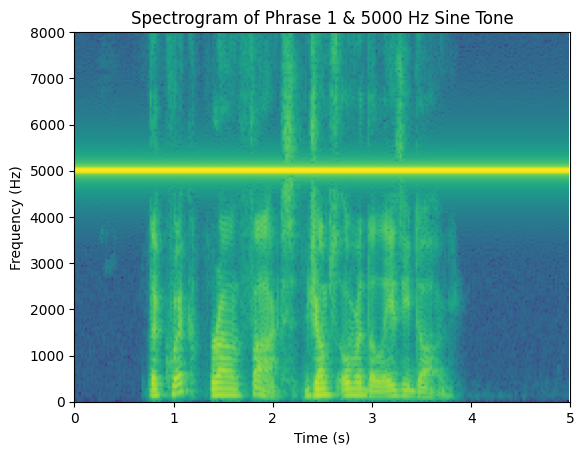

In [212]:
phrase_signal, sr = librosa.load("phrase1.wav", sr=None) # Loading recorded phrase

mixed_signal = phrase_signal + sine_tone

mixed_signal /= np.max(np.abs(mixed_signal)) # Normalizing
scaled_mixed_signal = (mixed_signal*32767).astype(np.int16) # Need to scale for right format
write("teamJCLM-speechchirp.wav", sr, scaled_mixed_signal) # Saving to WAV file

plt.specgram(mixed_signal, Fs=sr, NFFT=1024)
plt.title('Spectrogram of Phrase 1 & 5000 Hz Sine Tone')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.xlim(0, 5)
plt.ylim(0, 8000)
plt.show()

In [213]:
# Playing Phrase 1 + 5000 Hz Sine Tone
ipd.Audio(mixed_signal, rate=sr)

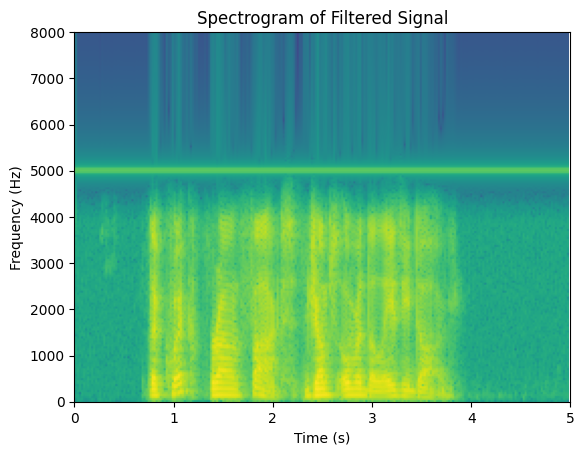

In [214]:
from scipy.signal import butter, filtfilt

fc = 4000  # Cut-off frequency
order = 20
normalized_fc = fc/(sr/2)

b, a = butter(order, normalized_fc, btype='low', analog=False) # Butterworth lowpass

filtered_signal = filtfilt(b, a, mixed_signal) # Filtering

filtered_signal /= np.max(np.abs(filtered_signal)) # Normalizing 
scaled_filtered_signal = (filtered_signal*32767).astype(np.int16) # Need to scale for right format
write("teamJCLM-filteredspeechsine.wav", sr, scaled_filtered_signal) # Saving to WAV file

plt.specgram(filtered_signal, Fs=sr, NFFT=1024)
plt.title('Spectrogram of Filtered Signal')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.xlim(0, 5)
plt.ylim(0, 8000)
plt.show()

In [215]:
# Playing Filtered Signal
ipd.Audio(filtered_signal, rate=sr)

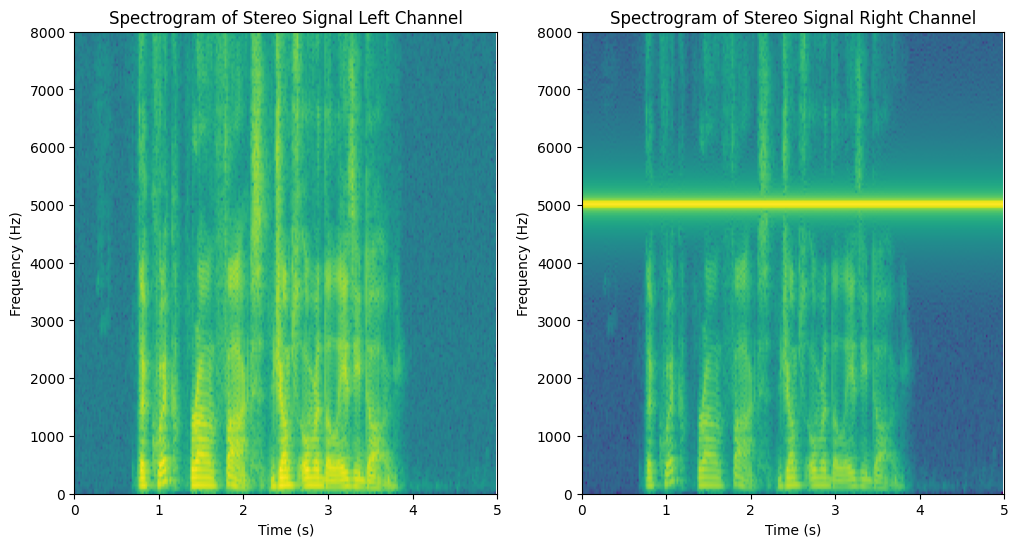

In [216]:
stereo_signal = np.zeros((len(phrase_signal), 2)) # Stereo signal array

stereo_signal[:, 0] = phrase_signal # Left channel
stereo_signal[:, 1] = mixed_signal  # Right channel

stereo_signal /= np.max(np.abs(stereo_signal)) # Normalizing 
scaled_stereo_signal = (stereo_signal*32767).astype(np.int16) # Need to scale for right format
write("teamJCLM-stereospeechsine.wav", sr, scaled_stereo_signal)  # Saving to WAV file

plt.figure(figsize=(12, 6))

# Left Channel
plt.subplot(1, 2, 1)
plt.specgram(stereo_signal[:, 0], Fs=sr, NFFT=1024)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.xlim(0, 5)
plt.ylim(0, 8000)
plt.title('Spectrogram of Stereo Signal Left Channel')

# Right Channel
plt.subplot(1, 2, 2)
plt.specgram(stereo_signal[:, 1], Fs=sr, NFFT=1024)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.xlim(0, 5)
plt.ylim(0, 8000)
plt.title('Spectrogram of Stereo Signal Right Channel')
plt.show()